In [21]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Freeze plots
%matplotlib inline

#Read world bank GDP Data
df = pd.read_excel("data_files\Worldbank GDP Data.xlsx",index_col=0)

#Fill missing values with 0 
df = df.fillna(0)

#express in billions of dollars
df = df /1000000000

df.tail()

,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2015,2.919553,19.907111,116.193649,11.386846,2.789870,2529.694234,358.135058,594.749285,10.553338,0.661,...,3.748,193.241109,0.759690,75198.758495,0.788307,6.442916,36.976205,317.620523,21.243347,19.963121
2016,2.965922,19.362642,101.123851,11.861201,2.896679,2463.433552,357.045065,557.531376,10.546135,0.652,...,3.863,205.276172,0.804333,76335.795445,0.799376,6.719172,28.084676,296.357283,20.954762,20.548678
2017,3.056425,20.191760,122.123822,13.019693,3.000181,2513.494435,385.605507,642.695865,11.527459,0.602,...,3.855,223.779866,0.880044,81229.182706,0.831904,7.245707,24.561328,349.554117,25.868142,22.040902
2018,0.000000,19.484385,101.353231,15.147021,3.218316,2772.024699,422.215044,519.871520,12.457942,0.636,...,0.000,245.213686,0.906050,86408.955453,0.820492,7.942962,27.591262,368.288940,27.005239,24.311560
2019,0.000000,19.101354,94.635416,15.278077,3.154058,2815.410447,421.142268,449.663447,13.672802,0.000,...,0.000,261.921245,0.917059,87751.540849,0.850655,7.926108,0.000000,351.431649,23.064722,21.440759


In [2]:
Countries = ["Germany","France","United Kingdom","Italy","Netherlands"]

gdps2019 = df.loc[2019,Countries]

gdps2019

Germany           3845.630031
France            2715.518274
United Kingdom    2827.113185
Italy             2001.244392
Netherlands        909.070395
Name: 2019, dtype: float64

### Create simple bar and horizontal bar graphs

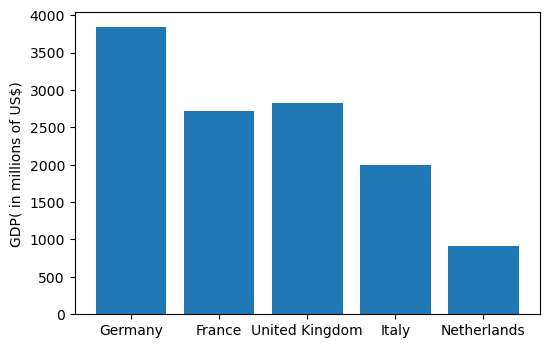

In [3]:
plt.figure(dpi=100)

plt.bar(gdps2019.index, gdps2019)
plt.ylabel("GDP( in millions of US$)")

plt.show()

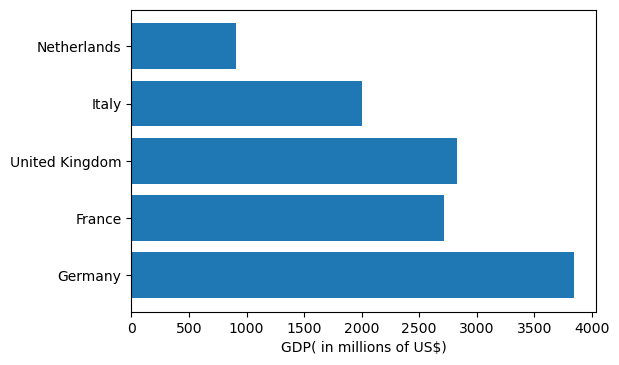

In [4]:
plt.figure(dpi=100)

plt.barh(gdps2019.index, gdps2019)
plt.xlabel("GDP( in millions of US$)")
plt.show()

### Adding Error Bars

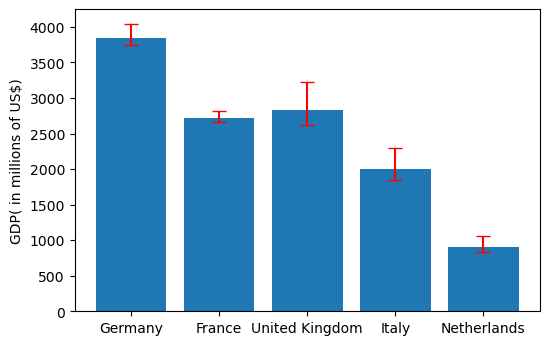

In [6]:
plt.figure(dpi=100)

min_error = [100, 50, 200, 150, 75]
max_error = [200, 100, 400, 300, 150]
sym_error = [200, 100, 400, 300, 150]
#symmetric error bars
#plt.bar(gdps2019.index, gdps2019, yerr= sym_error, ecolor='k', capsize=15 )

# asymmetric error bars
plt.bar(gdps2019.index, gdps2019, yerr= [min_error, max_error], ecolor='r', capsize=5 )

plt.ylabel("GDP( in millions of US$)")

plt.show()

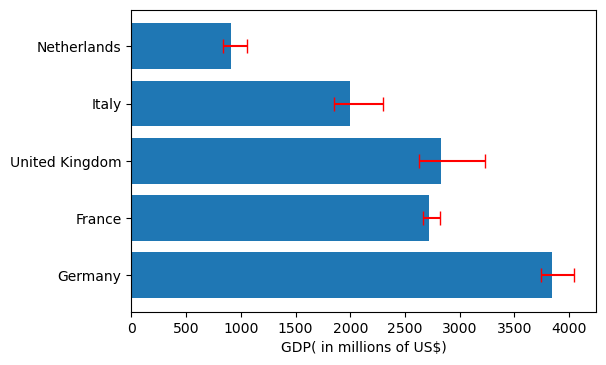

In [7]:
plt.figure(dpi=100)

min_error = [100, 50, 200, 150, 75]
max_error = [200, 100, 400, 300, 150]

plt.barh(gdps2019.index, gdps2019,xerr= [min_error, max_error], ecolor='r', capsize=5)
plt.xlabel("GDP( in millions of US$)")
plt.show()

### Modify colors of bars for the same series

Use hex codes.

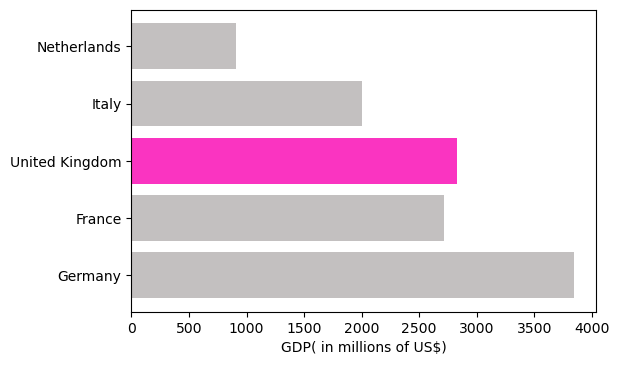

In [8]:
plt.figure(dpi=100)

colorCodes = ["#C3C0C0","#C3C0C0","#FA34C1","#C3C0C0","#C3C0C0"]

plt.barh(gdps2019.index, gdps2019,color=colorCodes)
plt.xlabel("GDP( in millions of US$)")

plt.show()

### Write values on bars

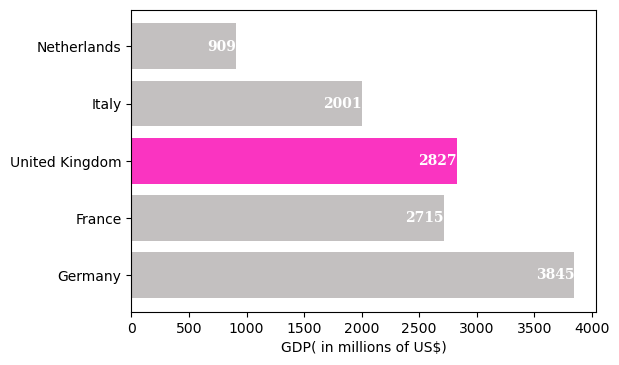

In [11]:
import matplotlib.font_manager as fm

plt.figure(dpi=100)

colorCodes = ["#C3C0C0","#C3C0C0","#FA34C1","#C3C0C0","#C3C0C0"]

plt.barh(gdps2019.index, gdps2019,color=colorCodes)
plt.xlabel("GDP( in millions of US$)")

for i in range(len(Countries)):
    plt.text(gdps2019[Countries[i]], i , int(gdps2019[Countries[i]]),
            horizontalalignment='right',
            verticalalignment='center',
            fontsize=8,
            color="w",
            fontproperties=fm.FontProperties(family="serif", weight="bold"))
plt.show()

### Display multiple bars for the same label

Let's add GDPs from 2015 and 2010 to the chart as well.

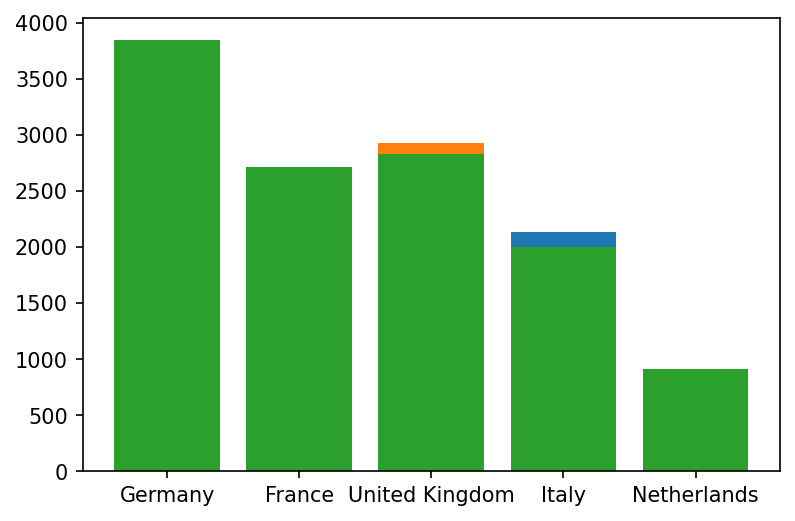

In [12]:
gdps2015 = df.loc[2015,Countries]
gdps2010 = df.loc[2010,Countries]

plt.figure(dpi = 150)

plt.bar(gdps2010.index, gdps2010)
plt.bar(gdps2015.index, gdps2015)
plt.bar(gdps2019.index, gdps2019)

plt.show()

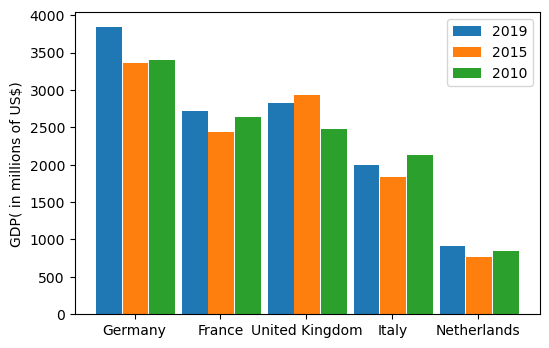

In [16]:
gdps2015 = df.loc[2015,Countries]
gdps2010 = df.loc[2010,Countries]

#set a bin width
bin_width = 0.3
epsiln = 0.01
plt.figure(dpi=100)

# range from 0 to 5. Indexing the positions in the bar chart 
x = np.arange(5)

#add 2019 GDPs in the first position
plt.bar(x, gdps2019,width=bin_width)

#add 2015 GDPs in the second position moving to the left as much as the bin size
plt.bar(x + bin_width + epsiln, gdps2015, width=bin_width)

#add 2010 GDPs in the third position moving to the left as much as the bin size
plt.bar(x + 2 * (bin_width + epsiln) , gdps2010,width=bin_width)

plt.ylabel("GDP( in millions of US$)")

#replace indexes (0,1,2,..) with country names
plt.xticks(x+bin_width, gdps2019.index)

#add legend
plt.legend(["2019","2015","2010"])

plt.show()

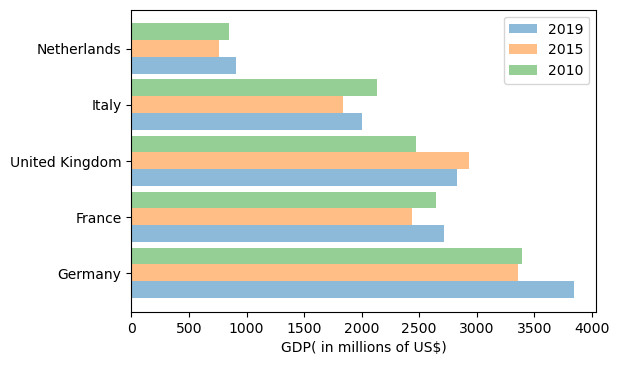

In [17]:
gdps2015 = df.loc[2015,Countries]
gdps2010 = df.loc[2010,Countries]

#set a bin width
bin_height = 0.3

plt.figure(dpi=100)

# range from 0 to 5. Indexing the positions in the bar chart 
y = np.arange(5)

#add 2019 GDPs in the first position
plt.barh(y, gdps2019,height=bin_height,alpha=0.5)

#add 2015 GDPs in the second position moving to the left as much as the bin size
plt.barh(y + bin_height, gdps2015, height=bin_height ,alpha = 0.5)

#add 2010 GDPs in the third position moving to the left as much as the bin size
plt.barh(y + 2*bin_height, gdps2010,height=bin_height,alpha =0.5)

plt.xlabel("GDP( in millions of US$)")

#replace indexes (0,1,2,..) with country names
plt.yticks(y+bin_height, gdps2019.index)

#add legend
plt.legend(["2019","2015","2010"])

plt.show()

### Create a simple pie chart

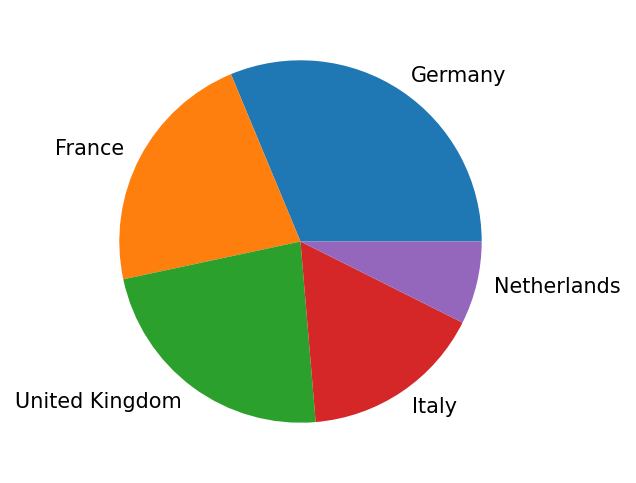

In [36]:
plt.figure(dpi=150)

plt.pie(gdps2019, labels= gdps2019.index)

plt.show()

### Display percentages on the wedges

We use *autopct* parameter to do this. autopct= '%0.**x**f' will display percentages up to **x** significant figures. If we want percentage sign at the end as well, then it becomes '%0.**x**f%%'

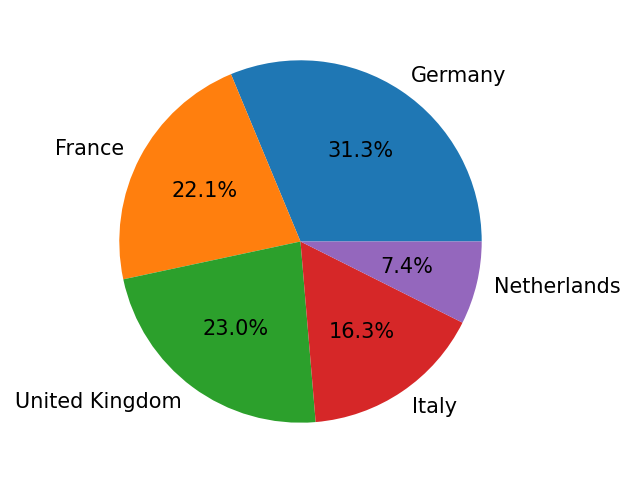

In [38]:
plt.figure(dpi=150)

plt.pie(gdps2019, labels= gdps2019.index, autopct='%0.1f%%')

plt.show()

### Explode wedges to make an emphasis

We can use *explode* parameter of ```pyplot.pie()``` function to achieve this. We supply a list of explode measures for each wedge.

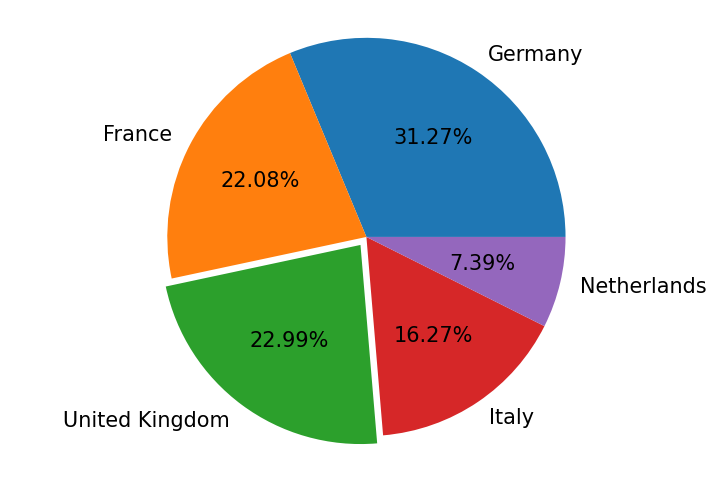

In [41]:
plt.figure(dpi=150)

explodeMeasure1 = [0, 0, 0.05, 0, 0]

explodeMeasure2 = [0.1, 0.1, 0.3, 0.1, 0.1]

#Only explode United Kingdom 
plt.pie(gdps2019, labels= gdps2019.index, autopct='%0.2f%%', explode = explodeMeasure1)

#Explode all 
#plt.pie(gdps2019, labels= gdps2019.index, autopct='%0.2f%%', explode = explodeMeasure2)

plt.axis("equal")

plt.show()

### Rotate a pie graph

Use *startangle* parameter. We want to put more emphasis on United Kingdom, so let's bring it to the upper left corner. Which is about 90 degree turn clockwise. Positive values of *startangle* will make the pie chart turn counter-clockwise.   

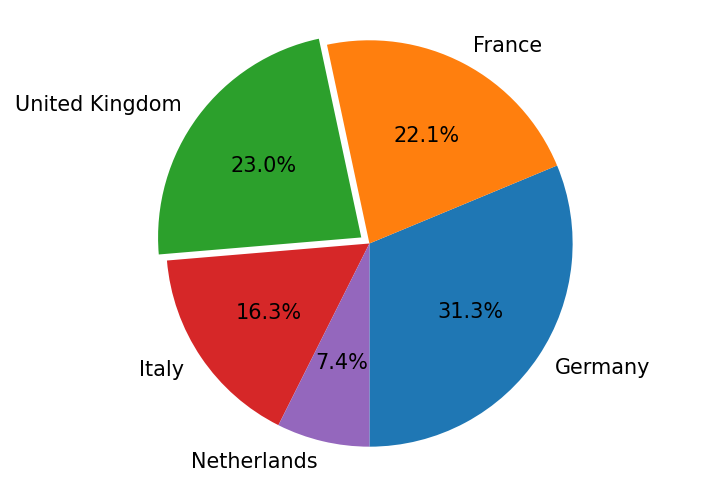

In [42]:
plt.figure(dpi=150)

explodeMeasure1 = [0, 0, 0.05, 0, 0]

#Add shadows and rotate the plot 
plt.pie(gdps2019, labels= gdps2019.index, 
        autopct='%0.1f%%', 
        explode = explodeMeasure1,
        startangle = -90)
plt.axis("equal")

plt.show()

### Use colors from a different color map

This is a bit trickier compared to line and scatter plots. We need to explicitly get the colormap from pyplot and get the color codes from the colormap. 

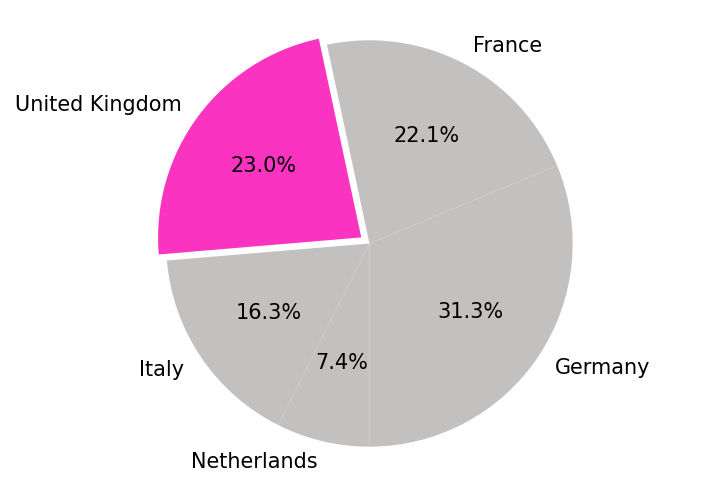

In [45]:
plt.figure(dpi=150)

explodeMeasure1 = [0, 0, 0.05, 0, 0]

# get the colormap of your choice
cmap = plt.get_cmap("tab20c")

#use random colors
np.random.seed(15)
colors1 = cmap(np.random.randint(1,20,5))

#use specific colors
colors2 = cmap([1, 2, 5, 6, 9])

colorCodes = ["#C3C0C0","#C3C0C0","#FA34C1","#C3C0C0","#C3C0C0"]

#Add shadows and rotate the plot 
plt.pie(gdps2019, labels= gdps2019.index, 
        autopct='%0.1f%%', 
        explode = explodeMeasure1,
        startangle = -90,
       colors=colorCodes)

plt.axis("equal")

plt.show()

In [16]:
colors1

array([[0.45490196, 0.76862745, 0.4627451 , 1.        ],
       [0.61960784, 0.60392157, 0.78431373, 1.        ],
       [0.99215686, 0.68235294, 0.41960784, 1.        ],
       [0.41960784, 0.68235294, 0.83921569, 1.        ],
       [0.19215686, 0.63921569, 0.32941176, 1.        ]])

### Convert pie into a donut

Use *wedgeprops* to reduce the size of the wedge.  

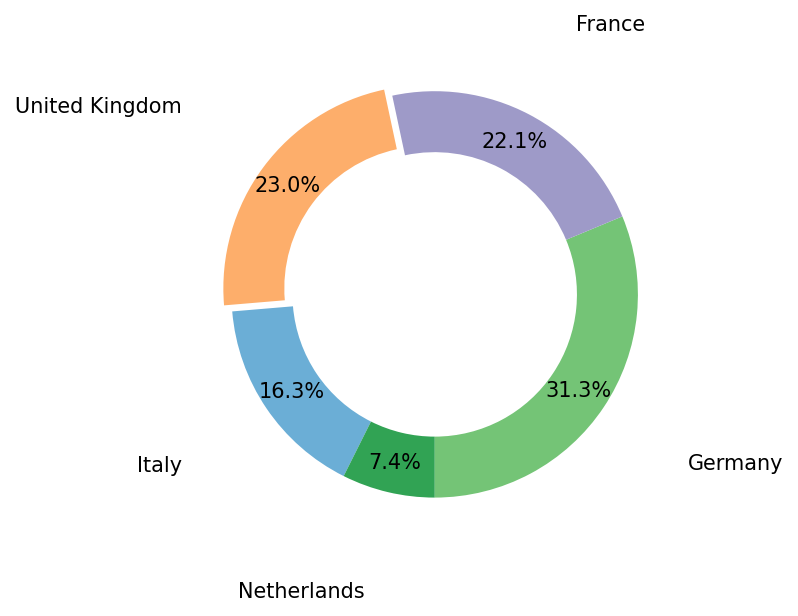

In [50]:
plt.figure(dpi=150)

explodeMeasure1 = [0, 0, 0.05, 0, 0]

# get the colormap of your choice
cmap = plt.get_cmap("tab20c")

#use random colors
np.random.seed(15)
colors1 = cmap(np.random.randint(1,20,5))

#use specific colors
#colors2 = cmap(np.array([1, 2, 5, 6, 9]))

#Add shadows and rotate the plot 
plt.pie(gdps2019, labels= gdps2019.index, 
        autopct='%0.1f%%', 
        explode = explodeMeasure1,
        startangle = -90,
       colors=colors1,
        pctdistance = 0.85,
        labeldistance = 1.5,
       wedgeprops=dict(width=0.3))

plt.axis("equal")

plt.show()

### Nested wedges 

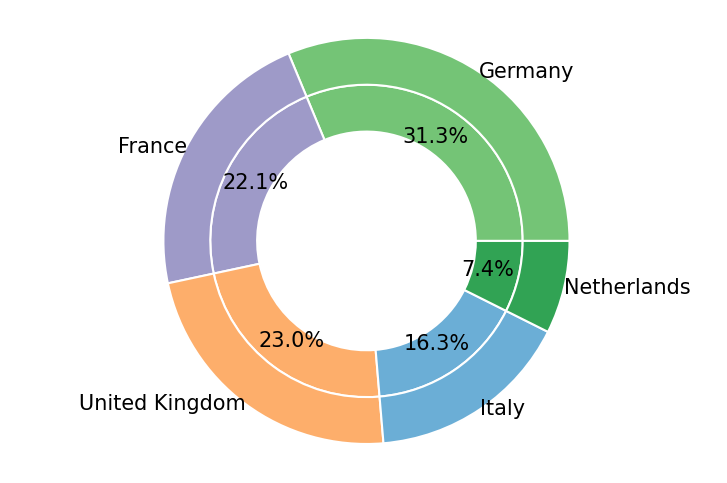

In [53]:
plt.figure(dpi=150)

# get the colormap of your choice
cmap = plt.get_cmap("tab20c")

size = 0.3

#use random colors
np.random.seed(15)
colors1 = cmap(np.random.randint(1,20,5))

#use specific colors
#colors2 = cmap(np.array([1, 2, 5, 6, 9]))

#Add shadows and rotate the plot 
plt.pie(gdps2019, radius= 1, labels= gdps2019.index, 
       colors=colors1, autopct='%0.1f%%',
        labeldistance=1.3,
        pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(gdps2019, radius= 1+size,  
      colors=colors1,
       wedgeprops=dict(width=size, edgecolor='w'))


plt.axis("equal")

plt.show()

### Histograms

Histograms are great ways to explore the distribution of a given data. It is not possible to get a good distribution out of the GDP data, so let's create some artificial data to create histograms. 

In [81]:
#draw 1000 samples from a normal distribution with mean 100 and std dev 20
artf_data = list(np.random.normal(100,20,1000))

#add few outliers
artf_data.append(1000000)
artf_data.append(500000)
artf_data.append(0)
artf_data.append(-1000)

In [82]:
artf_data

[111.22752498522756,
 116.45382883917121,
 107.77303863529012,
 93.99137462162834,
 100.04473804848861,
 89.63169219617522,
 106.42915952372478,
 100.67527495841233,
 123.96771455271524,
 94.42317190289836,
 119.62697671177645,
 114.71539572558481,
 93.91744100833088,
 82.89474705277888,
 88.921473347367,
 114.87728343163666,
 81.92003357550409,
 84.95483265778921,
 57.210709645798076,
 93.7836238743141,
 127.91486286845758,
 84.14655392346287,
 121.6230848664602,
 65.33991504745734,
 105.96193677386373,
 105.3588422413862,
 124.1061614399697,
 106.55145394438951,
 78.52575027993439,
 124.0427894381302,
 124.52449653043391,
 117.26317132139341,
 76.68108106719279,
 106.17036896008474,
 135.17240452314056,
 97.47308412807409,
 85.84939304318438,
 116.49892923531152,
 77.27257375545818,
 87.25351249677811,
 95.74963549160337,
 131.21145321929515,
 95.66296384553455,
 111.4238483133372,
 89.24567699514276,
 112.05884586653076,
 119.31283341402599,
 70.09461351616397,
 117.44806697508163,


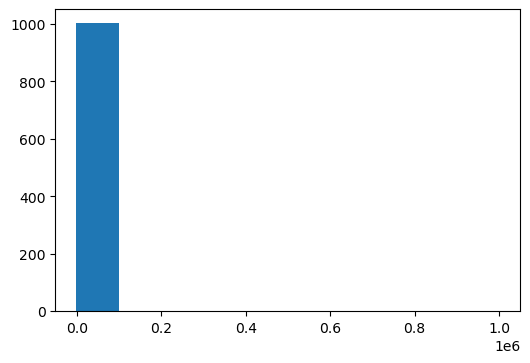

In [83]:
#create a histogram
plt.figure(dpi=100)

plt.hist(artf_data)

plt.show()


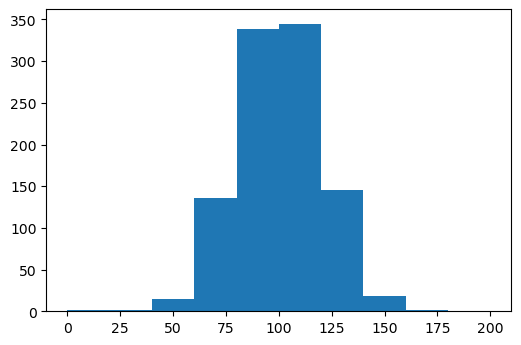

In [84]:
#the outliers are causing a very odd shape
plt.figure(dpi=100)

#set a range  that leaves outliers out
plt.hist(artf_data, range=(0,200))

plt.show()

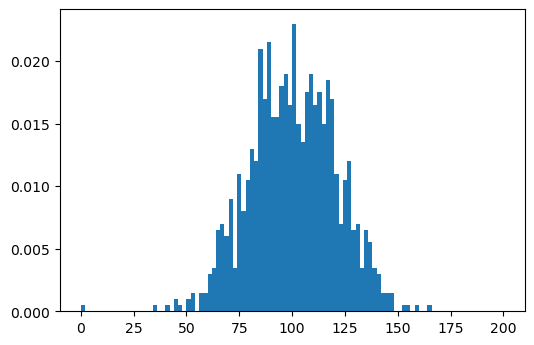

In [87]:
#looks more like a normal distribution now. Let's increase the resolution by increasing the # of bins

#the outliers are causing a very odd shape
plt.figure(dpi=100)

#specify number of bins as 20
#plt.hist(artf_data, range=(0,200),bins=20)

#specify number of bins as 100
plt.hist(artf_data, range=(0,200),bins=100, density = True)

plt.show()

### Specifying different bin lengths

If you want custom bin sizes, you can use *bins* parameter of ```pyplot.hist()``` function. You specify the edges of all bins in a list

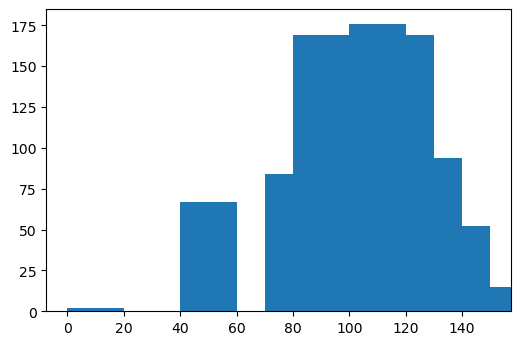

In [89]:
#the outliers are causing a very odd shape
plt.figure(dpi=100)

edges= [0, 40, 70, 80, 90, 100, 110, 120, 130, 140, 150]

#specify custom bin edges. 
plt.hist(artf_data, range=(0,200),bins=edges, width = 20)

plt.show()

# Practice Questions

### Question 1

Remake the figure you see below: 
![practice 2](images\practice2.png)

In [24]:
Practice_Countries = ["Turkey", "Korea", "Netherlands"]

#TODO: Code here

plt.show()

### Question 2

Write the code that produces the bar plot below 
![practice bar_2](images\bar_example2.png)

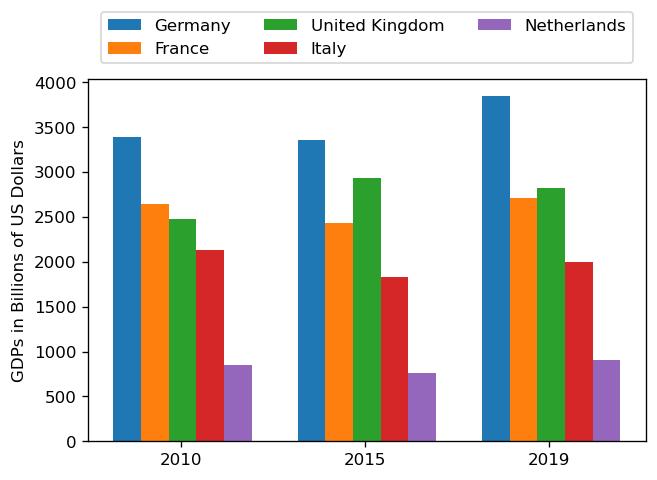

In [35]:
gdps2019 = df.loc[2019,Countries]
gdps2015 = df.loc[2015,Countries]
gdps2010 = df.loc[2010,Countries]

#TODO: Code here
df_New = pd.DataFrame(data = {"2010": gdps2010 , "2015":gdps2015, "2019":gdps2019})
df_New = df_New.transpose()
df_New

bin_width = 0.15
epsilon = 0.01

x = np.arange(0,3)

plt.figure(dpi =120)

i = 0
for country in df_New.columns:
    plt.bar(x + i*bin_width + epsilon, df_New[country], width=bin_width)
    i += 1
    
plt.legend(df_New.columns, ncol = 3, loc="lower center", bbox_to_anchor= (0.5, 1.02))
plt.xticks(x + 2*bin_width, df_New.index) 
plt.ylabel("GDPs in Billions of US Dollars")
plt.show()

### Queston 3 

Remake following figure: 

![practice 3](images\practice3.png)

In [54]:
Practice_Countries = ["Turkey", "Korea", "Netherlands"]

#TODO: Code here


### Question 4 

Now let's assume that we are given more details about the GDPs of Turkey, Netherlands and Korea. We are given the percentages of agriculture, industry and service sectors within the GDP. Add this information as an inner wedge chart to the example above. Final product should look like this:
![practice 4](images\wedge_example2.png)

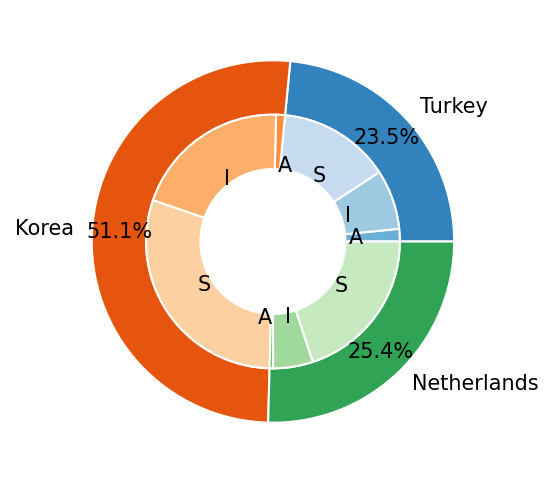

In [80]:
plt.figure(dpi=150)

Practice_Countries = ["Turkey", "Korea", "Netherlands"]

gdpPractice2019 = df.loc[2019, Practice_Countries]

Labels = ["Agriculture", "Industry", "Services"]
Turkey= np.array([6.8 , 32.3, 60.7])
Korea= np.array([2.2 , 39.3, 58.3])
Netherlands= np.array([1.6 , 17.9, 70.2])

#TODO: Implement here

tr = gdpPractice2019["Turkey"]*Turkey
kr = gdpPractice2019["Korea"]*Korea
nl = gdpPractice2019["Netherlands"]*Netherlands

allCountries = np.concatenate((tr,kr,nl), axis=0)

cmap = plt.get_cmap("tab20c")
colorOuter = cmap([0,4,8])

size = 0.3

plt.pie([tr.sum(), kr.sum(), nl.sum()], 
        labels= gdpPractice2019.index,
        radius= 1,
       autopct='%0.1f%%',
        colors= colorOuter,
        pctdistance = 0.85,
       wedgeprops = dict(width=size,edgecolor='w')  )

colorInner = cmap([1,2,3,5,6,7,9,10,11])
innerLabel = ["A", "I", "S","A", "I", "S","A", "I", "S"]
plt.pie(allCountries, radius = 1 - size,
        labels= innerLabel,
       colors= colorInner,
        labeldistance= 0.6,
       wedgeprops = dict(width=size,edgecolor='w'))

plt.show()

### Question 4

Create 1000 random samples from a triangular distribution which has low=0 , mode= 70, max=100 parameters. Create a histogram of those 1000 samples using 50 bins. 

**numpy triangular:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

(array([ 1.,  2.,  4.,  7., 12.,  8.,  9., 11.,  6., 14., 11., 12., 15.,
        10., 21., 20., 18., 13., 27., 13., 34., 23., 23., 26., 23., 30.,
        31., 37., 25., 28., 42., 42., 30., 37., 33., 51., 29., 18., 33.,
        28., 25., 20., 15., 25., 16., 11., 14.,  7.,  8.,  2.]),
 array([ 3.11706704,  5.03013766,  6.94320828,  8.8562789 , 10.76934952,
        12.68242015, 14.59549077, 16.50856139, 18.42163201, 20.33470263,
        22.24777325, 24.16084387, 26.0739145 , 27.98698512, 29.90005574,
        31.81312636, 33.72619698, 35.6392676 , 37.55233822, 39.46540885,
        41.37847947, 43.29155009, 45.20462071, 47.11769133, 49.03076195,
        50.94383257, 52.8569032 , 54.76997382, 56.68304444, 58.59611506,
        60.50918568, 62.4222563 , 64.33532692, 66.24839755, 68.16146817,
        70.07453879, 71.98760941, 73.90068003, 75.81375065, 77.72682127,
        79.63989189, 81.55296252, 83.46603314, 85.37910376, 87.29217438,
        89.205245  , 91.11831562, 93.03138624, 94.94445687,

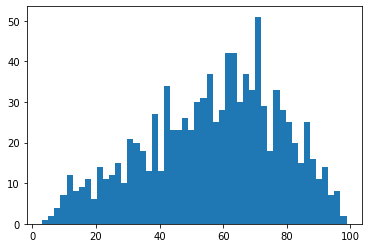

In [92]:
#TODO: Implement Here

sample = np.random.triangular(0,70,100, size = 1000)

plt.hist(sample, bins = 50)

create 1000 random samples from an exponential distribution with parameter lambda = 0.5. Create a histogram using 20 bins.

**Exponential Distribution:** https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html

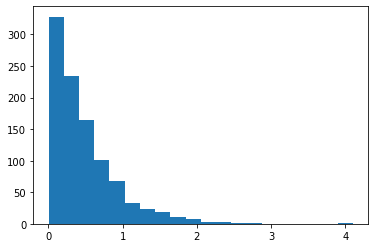

In [94]:
#TODO: Implement Here
sample = np.random.exponential(scale= 0.5, size = 1000)
plt.hist(sample, bins = 20)
plt.show()